In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
data = pd.read_csv('Fuel_Consumption.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
org_data = data.copy()
data = data[['ENGINESIZE', 'CO2EMISSIONS']]

data.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


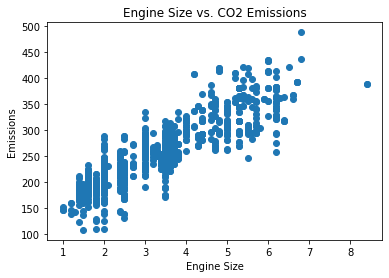

In [4]:
# Scatter Plot

plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'])
plt.title("Engine Size vs. CO2 Emissions")
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

In [5]:
# Separating data into training (80%) and testing (20%)

num = int(len(data)*.8)

# Training Set
train = data[:num]

# Testing Set
test = data[num:]

print({f"Data : {len(data)}"})
print({f"Train : {len(train)}"})
print({f"Test : {len(test)}"})

{'Data : 1067'}
{'Train : 853'}
{'Test : 214'}


In [7]:
# Training the model

regr = linear_model.LinearRegression()

train_x = np.array(train[["ENGINESIZE"]])
train_y = np.array(train[["CO2EMISSIONS"]])

regr.fit(train_x, train_y)

coefficients = regr.coef_
intercept = regr.intercept_

print(f"slope : {coefficients[0]}")
print(f"intercept : {intercept}")

slope : [38.79512384]
intercept : [127.16989951]


In [10]:
# Predicting values for the whole data set
predicted_data = regr.predict(data[["ENGINESIZE"]])
predicted_data[:5]

array([[204.76014718],
       [220.27819672],
       [185.36258526],
       [262.95283294],
       [262.95283294]])

In [11]:
# Predicting values for the training data
predicted_train = regr.predict(train[["ENGINESIZE"]])
predicted_train[:5]

array([[204.76014718],
       [220.27819672],
       [185.36258526],
       [262.95283294],
       [262.95283294]])

In [12]:
# Predicting values for the testing data
predicted_test = regr.predict(test[["ENGINESIZE"]])
predicted_test[:5]

array([[224.1577091 ],
       [262.95283294],
       [224.1577091 ],
       [224.1577091 ],
       [197.00112241]])

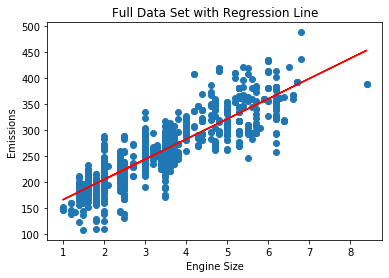

In [14]:
# Plot Whole Data Set with Regression Line
plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'])
plt.plot(data["ENGINESIZE"], predicted_data, color='red')
plt.title("Full Data Set with Regression Line")
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

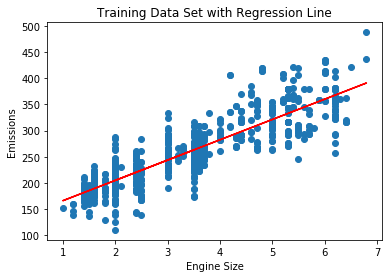

In [15]:
# Plot Training Data Set with Regression Line
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'])
plt.plot(train["ENGINESIZE"], predicted_train, color='red')
plt.title("Training Data Set with Regression Line")
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

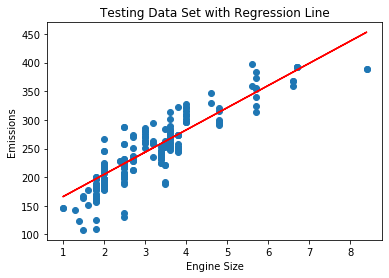

In [16]:
# Plot Training Data Set with Regression Line
plt.scatter(test['ENGINESIZE'], test['CO2EMISSIONS'])
plt.plot(test["ENGINESIZE"], predicted_test, color='red')
plt.title("Testing Data Set with Regression Line")
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.show()

In [20]:
# Create a data frame for actual and predicted values
a_p_data = pd.DataFrame({"actual" : data['CO2EMISSIONS'], "Predicted" : predicted_data[:][0][0]})

a_p_data.head()

,actual,Predicted
0,196,204.760147
1,221,204.760147
2,136,204.760147
3,255,204.760147
4,244,204.760147


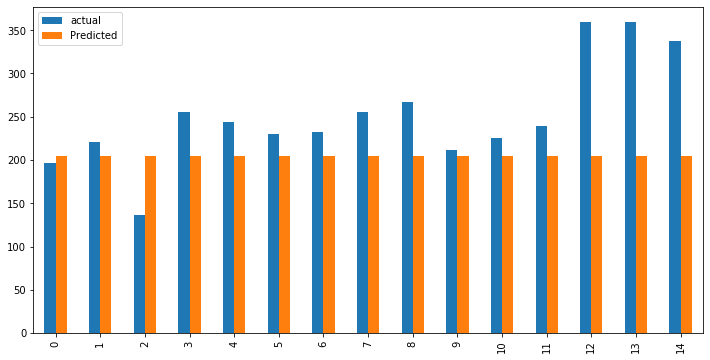

In [21]:
# Plot bar graph of actual vs. predicted
a_p_data.head(15).plot(kind='bar', figsize=(12,6))
plt.show()

In [23]:
# Calculating Error - residual sum of squares

test_x = np.array(test[["ENGINESIZE"]])
test_y = np.array(test[["CO2EMISSIONS"]])

predicted_y = regr.predict(test_x)

res = (predicted_y - test_y)
rss = (res**2).sum()

print(f"Residual Sum of Squares: {rss}")

Residual Sum of Squares: 159741.10295932178
